In [1]:
import matplotlib.pyplot as plt
import pandas as pd

csv_file = 'FIJI4_Robin_Wout.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file, sep=';')

# Modify df
df = df.replace(',', '.', regex=True)
df['Value'] = pd.to_numeric(df['Value'])
df['Concentration'] = pd.to_numeric(df['Concentration'])
df = df.sort_values(by=['Type','Concentration'])

# Question 3

In [2]:
cond1 = df['Type']=='A'
cond2 = df['Concentration']==1000
print(df[cond1&cond2]['Value'])

df[df['Type']=='DMSO']['Value']

0    6.94875
Name: Value, dtype: float64


20    58.455375
Name: Value, dtype: float64

# Question 4

In [3]:
from math import e, log
y = float(df[df['Type']=='DMSO'].iloc[:,2] / 2)

# For compound A, found via excel: y = -8,068ln(x) + 67,93
e**((y-67.93)/-8.068)

/var/folders/6v/_1qj_rk11_552ysbvhnjd2pr0000gn/T/ipykernel_17362/2997995285.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(df[df['Type']=='DMSO'].iloc[:,2] / 2)


121.14818185495604

# Question 5

/var/folders/6v/_1qj_rk11_552ysbvhnjd2pr0000gn/T/ipykernel_17362/1678390771.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(df[df['Type']=='DMSO'].iloc[:,2])


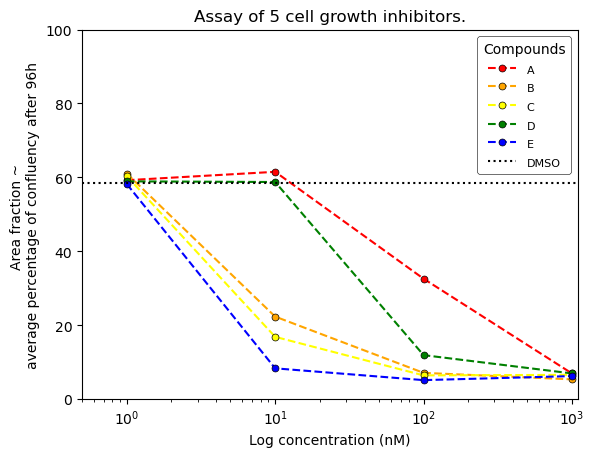

In [4]:
# Define a custom color mapping dictionary
color_mapping = {
    'A': 'red',
    'B': 'orange',
    'C': 'yellow',
    'D': 'green',
    'E': 'blue'}

fig, ax = plt.subplots()

for Type in df['Type'].unique():
    if Type != 'DMSO':
        x = df[df['Type']==Type].iloc[:,1]
        y = df[df['Type']==Type].iloc[:,2]
        plt.plot(x, y, 
                 marker='o', linestyle = '--',
                 color = color_mapping[Type], 
                 markersize=5, markerfacecolor=color_mapping[Type], 
                 markeredgecolor='black', markeredgewidth=0.5, label = Type)
        
# Add horizontal line for DMSO "background"
y = float(df[df['Type']=='DMSO'].iloc[:,2])
plt.axhline(y=y, color='black', linestyle=':', label='DMSO')

# Set axes
plt.xlabel('Log concentration (nM)')
plt.xscale('log')
ax.set_xticks([1,10,100,1000])
plt.xlim(0.5,1100)

plt.ylabel('Area fraction ~ \naverage percentage of confluency after 96h')
plt.ylim(0,100)

plt.title('Assay of 5 cell growth inhibitors.')

# Adjust legend
legend = plt.legend(loc='upper right')
legend.set_title('Compounds')
legend.get_frame().set_linewidth(0.5)  # Border thickness
legend.get_frame().set_edgecolor('black')
legend.get_title().set_fontsize(10)  # Title font size
for text in legend.get_texts():
    text.set_fontsize(8)  # Label font size

# Display the plot
plt.show()